# Phan loai mang noron voi TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2023-11-13 21:20:36.301715: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-13 21:20:36.891801: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-13 21:20:36.894762: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-13 21:20:39.585099: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.13.1


# Tao du lieu de xem va dieu chinh

In [2]:
from sklearn.datasets import make_circles

#tao 100 mau
n_samples = 1000

#tao circle
X,y = make_circles(n_samples,
                   noise= 0.03,
                   random_state=42)



In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
X.shape

(1000, 2)

In [5]:
y.shape

(1000,)

In [6]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [7]:
# tao dataframe co dac trung va nhan

import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [8]:
# Kiem tra cac nhan khac nhau
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

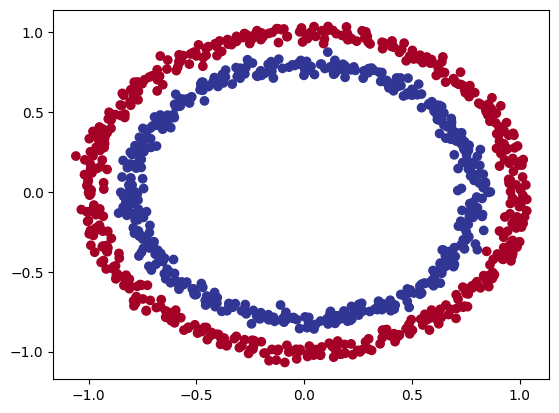

In [9]:
#Truc quan hoa voi bieu do
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [10]:
# Kiem tra shape 
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
len(X), len(y)

(1000, 1000)

In [12]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [13]:
X[919], y[919]

(array([0.53845414, 0.856206  ]), 0)

###Cac buoc lap mo hinh

In [14]:
# thiet lap random seed
tf.random.set_seed(42)

#1. Tao mo hinh su dung Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2 Bien dich mo hinh
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

#3 khop mo hinh
model_1.fit(X,y, epochs= 5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.4395 - accuracy: 0.4610
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 6.0379 - accuracy: 0.4950
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


In [15]:
model_1.fit(X,y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [16]:
# Thiet lap random seed
tf.random.set_seed(42)

#1 Tao mo hinh tuong tu model_1 nhung them 1 lop
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2 Bien dich mo hinh
model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

#3 Khop mo hinh
model_2.fit(X,y,epochs=100, verbose= 0)# dat verbose=0 de in ra it ket qua hon


In [17]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6934044361114502, 0.5]

## Cai thien mo hinh

In [18]:
# thiet lap random seed
tf.random.set_seed(42)

#1 tao mo hinh (3 lop)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

#2 Bien dich mo hinh
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#3 Khop mo hinh
model_3.fit(X,y,epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 2.5188 - accuracy: 0.4680
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7052 - accuracy: 0.5090
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4770
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.5190
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.5020
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5130
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.4890
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.4820
Epoch 11/

In [19]:
import numpy as np

def plot_decision_boundary(model, X, y):
 
  # Xác định ranh giới trục của biểu đồ và tạo meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Tạo các giá trị X (chúng ta sẽ dự đoán trên tất cả các giá trị)
  x_in = np.c_[xx.ravel(), yy.ravel()] # chồng các mảng 2D với nhau:

  # Đưa ra dự đoán sử dụng mô hình đã huấn luyện
  y_pred = model.predict(x_in)

  # Kiểm tra cho đa lớp
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # Chúng ta cần reshape các dự đoán để chuẩn bị vẽ biểu đồ
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Vẽ biểu đồ ranh giới quyết định
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


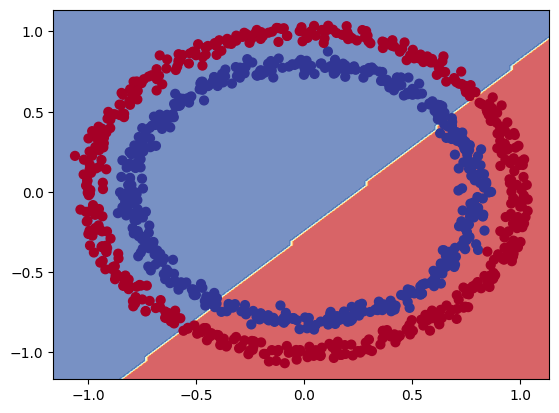

In [20]:
# Kiểm tra các dự đoán mà mô hình đưa ra
plot_decision_boundary(model_3, X, y)

In [21]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo một số dữ liệu hồi quy
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Chia thành tập huấn luyện và tập kiểm tra
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [22]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo lại mô hình
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Thay đổi loss và metrics của mô hình đã biên dịch
model_3.compile(loss=tf.keras.losses.mae, # đổi hàm mất mát thành hồi quy cụ thể
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # đổi metrics thành hồi quy cụ thể

# Khớp mô hình đã biên dịch
model_3.fit(X_reg_train.reshape(-1,1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 470.4162 - mae: 470.4162
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 363.1904 - mae: 363.1904
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 258.4093 - mae: 258.4093
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 147.6020 - mae: 147.6020
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 52.9985 - mae: 52.9985
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 83.6620 - mae: 83.6620
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 81.2042 - mae: 81.2042
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 50.1033 - mae: 50.1033
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 49.3510 - mae: 49.3510
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 47.0876 - mae: 47.0876
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 4ms/step


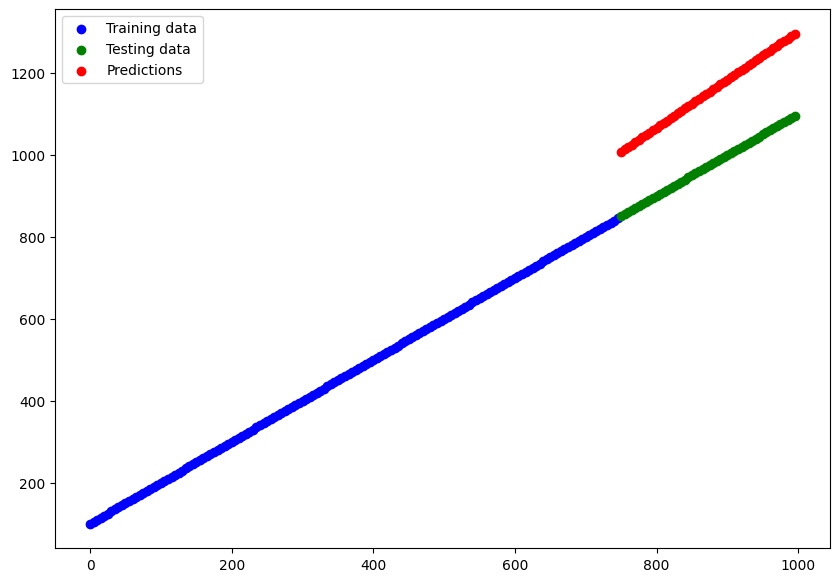

In [23]:
# Đưa ra dự đoán với mô hình đã huấn luyện
y_reg_preds = model_3.predict(y_reg_test)

# Vẽ các dự đoán của mô hình so với dữ liệu hồi quy
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend()

# Phan con thieu: Non-linearity


In [24]:
# Đặt random seed
tf.random.set_seed(42)

# Tạo mô hình
model_4 = tf.keras.Sequential([
  # 1 lớp ẩn với kích hoạt tuyến tính
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), 
  tf.keras.layers.Dense(1) # lớp đầu ra
])

# Biên dịch mô hình
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                # "lr" là viết tắt của "learning rate"
                metrics=["accuracy"])

# Khớp mô hình
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3409 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9746 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5463 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 2.2693 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3366 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2723 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2325 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1998 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1711 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1453 - accuracy: 0.5000
Epoch 11/

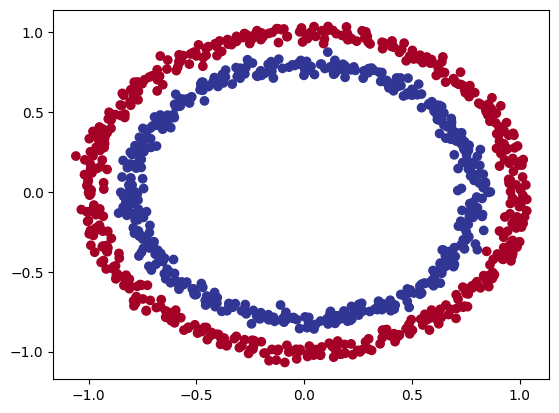

In [25]:
# Kiểm tra dữ liệu của chúng ta
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


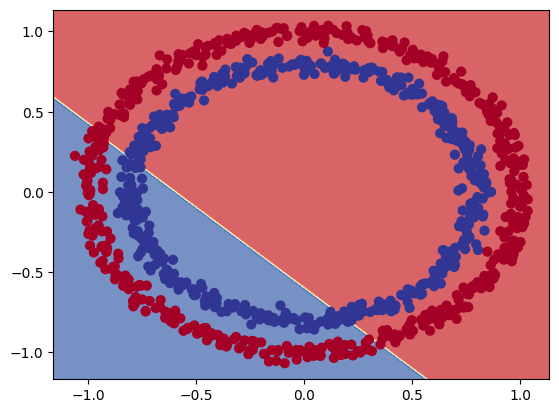

In [26]:
plot_decision_boundary(model_4, X, y)

In [27]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình với kích hoạt phi tuyến tính
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), 
  # cũng có thể đặt activation='relu'
  tf.keras.layers.Dense(1) # lớp đầu ra
])

# Biên dịch mô hình
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Khớp mô hình
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [28]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # lớp ẩn 1, 4 nơ-ron, kích hoạt ReLU
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # lớp ẩn 2, 4 nơ-ron, kích hoạt ReLU
  tf.keras.layers.Dense(1) # lớp đầu ra
])

# Biên dịch mô hình
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # tốc độ học mặc định của Adam là 0.001
                metrics=['accuracy'])

# Khớp mô hình
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.5971 - accuracy: 0.4410
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.8741 - accuracy: 0.4690
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8827 - accuracy: 0.4760
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8312 - accuracy: 0.4710
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8098 - accuracy: 0.4620
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7951 - accuracy: 0.4510
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7834 - accuracy: 0.4390
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7756 - accuracy: 0.4240
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7690 - accuracy: 0.4040
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7640 - accuracy: 0.3810
Epoch 11/

In [29]:
# Đánh giá mô hình
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.5651 - accuracy: 0.7030


[0.5650601983070374, 0.703000009059906]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


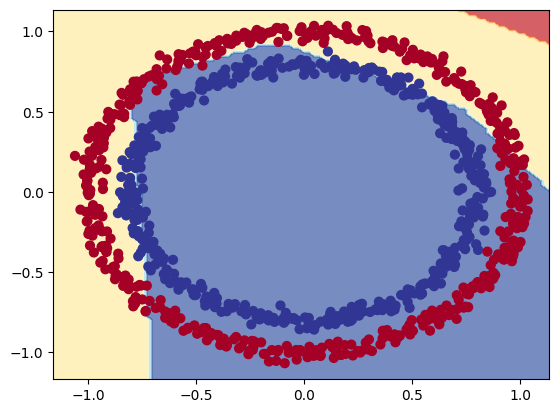

In [30]:
# Kiểm tra các dự đoán sử dụng 2 lớp ẩn
plot_decision_boundary(model_6, X, y)

In [31]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # lớp ẩn 1, kích hoạt ReLU
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # lớp ẩn 2, kích hoạt ReLU
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # lớp đầu ra, kích hoạt sigmoid
])

# Biên dịch mô hình
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Khớp mô hình
history = model_7.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7014 - accuracy: 0.4990
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4990
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4930
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5130
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5090
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5340
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5270
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.5360
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


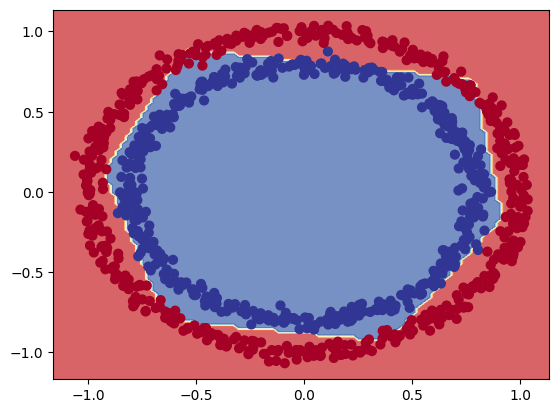

In [32]:
plot_decision_boundary(model_7, X, y)

In [33]:
# Tạo một tensor giả lập (giống với dữ liệu mà chúng ta truyền vào mô hình)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

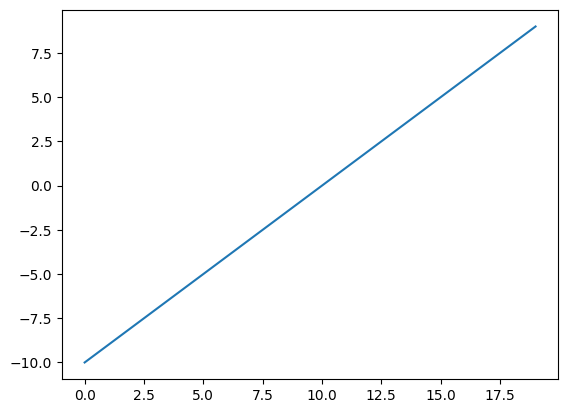

In [34]:
# Hiển thị tensor giả lập
plt.plot(A)

In [35]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Sử dụng hàm sigmoid trong tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

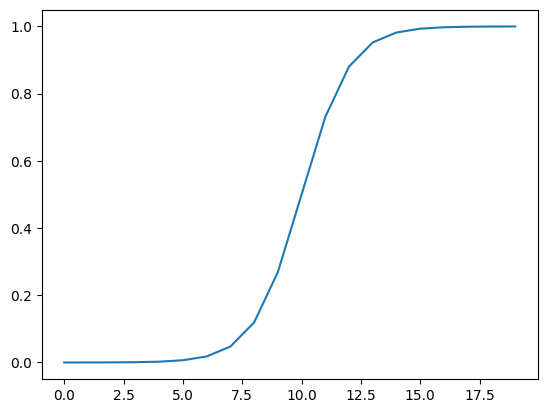

In [36]:
plt.plot(sigmoid(A))

In [37]:
def relu(x):
  return tf.maximum(0, x)

# Truyền tensor giả lập qua hàm ReLU
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

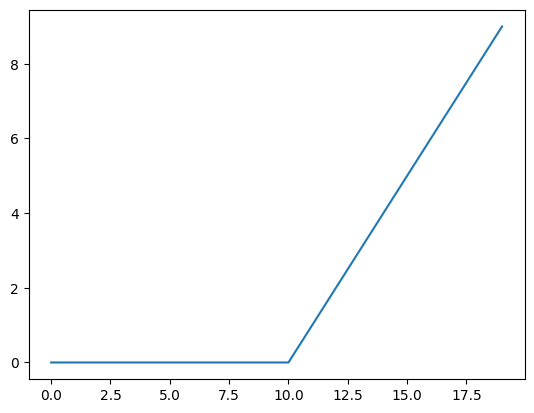

In [38]:
plt.plot(relu(A))

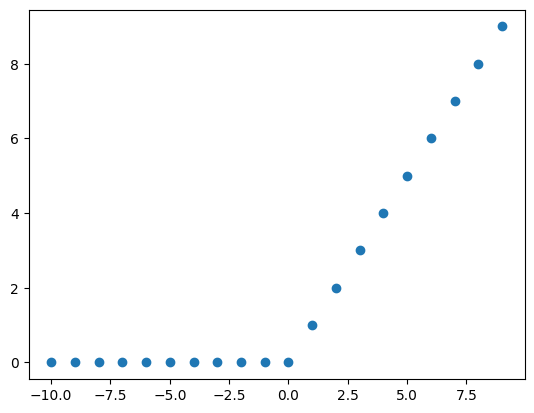

In [39]:
plt.scatter(x=A, y= relu(A))

In [40]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [41]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Danh gia va cai thien mo hinh phan loai

In [42]:
len(X)

1000

In [43]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, y_train = X[:800], y[:800] # 80% dữ liệu cho tập huấn luyện
X_test, y_test = X[800:], y[800:] # 20% dữ liệu cho tập kiểm tra

# Kiểm tra shape của dữ liệu
X_train.shape, X_test.shape # 800 mẫu trong tập huấn luyện, 200 mẫu trong tập kiểm tra

((800, 2), (200, 2))

In [44]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình (tương tự như model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # lớp ẩn 1, sử dụng "relu" cho kích hoạt (tương tự như tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # lớp đầu ra, sử dụng 'sigmoid' cho đầu ra
])

# Biên dịch mô hình
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # tăng tốc độ học từ 0.001 thành 0.01 để học nhanh hơn
                metrics=['accuracy'])

# Khớp mô hình
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25


25/25 [==============================] - 1s 5ms/step - loss: 0.6903 - accuracy: 0.5512
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5638
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6755 - accuracy: 0.5612
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.5825
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6593 - accuracy: 0.6375
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6487 - accuracy: 0.5938
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6349 - accuracy: 0.6837
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6184 - accuracy: 0.6888
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6002 - accuracy: 0.7138
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.7275
Epoch 11/25
25/25 [===========

In [45]:
# Đánh giá mô hình trên tập kiểm tra
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.3221 - accuracy: 0.8950
Model loss on the test set: 0.3221374750137329
Model accuracy on the test set: 89.50%


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


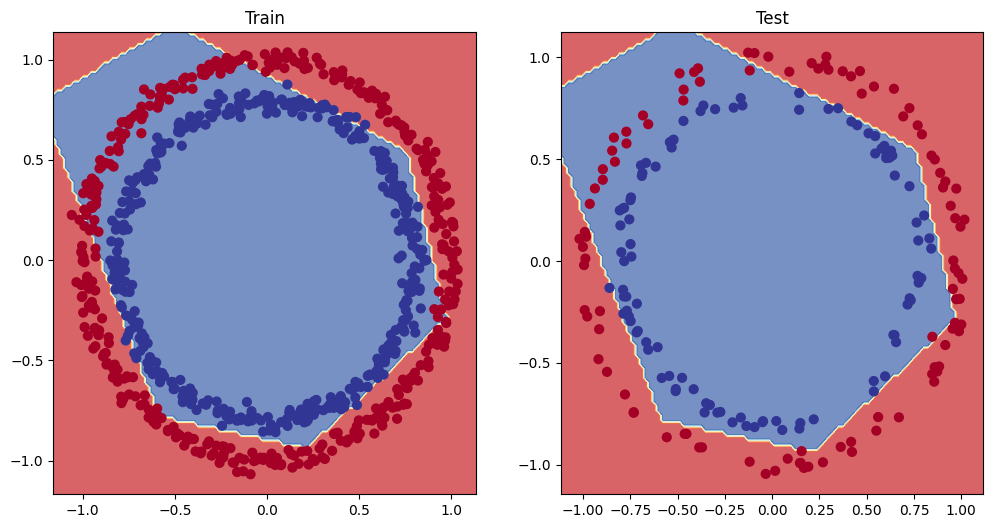

In [46]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

# Ve loss curve

In [47]:
# Chúng ta có thể truy cập thông tin trong biến history bằng thuộc tính .history
pd.DataFrame(history.history)

,loss,accuracy
0,0.690305,0.55125
1,0.682267,0.56375
2,0.675493,0.56125
3,0.668881,0.58250
4,0.659257,0.63750
5,0.648741,0.59375
6,0.634899,0.68375
7,0.618396,0.68875
8,0.600176,0.71375
9,0.571936,0.72750


Text(0.5, 1.0, 'Model_8 training curves')

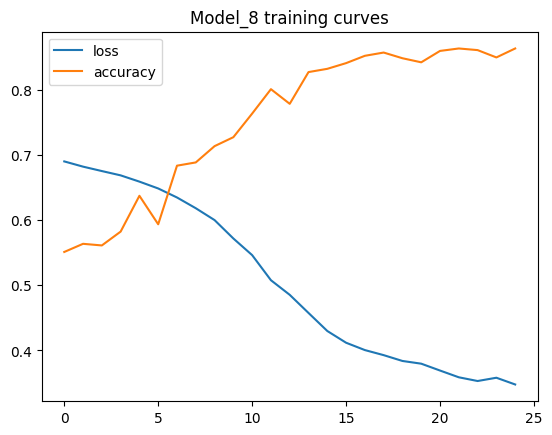

In [48]:
# Vẽ loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

In [49]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình (tương tự như model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Biên dịch mô hình
model_9.compile(loss="binary_crossentropy", # chúng ta cũng có thể sử dụng string ở đây
              optimizer="Adam", # tương tự như tf.keras.optimizers.Adam() với các thiết lập mặc định
              metrics=["accuracy"])

# Tạo learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # xem xét một tập hợp các giá trị tốc độ học từ 1e-4, tăng 10**(epoch/20) mỗi epoch

# Khớp mô hình (truyền lr_scheduler callback)
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.4712 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.4787 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.4762 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.4787 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.4800 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.4837 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.4825 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.4837 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

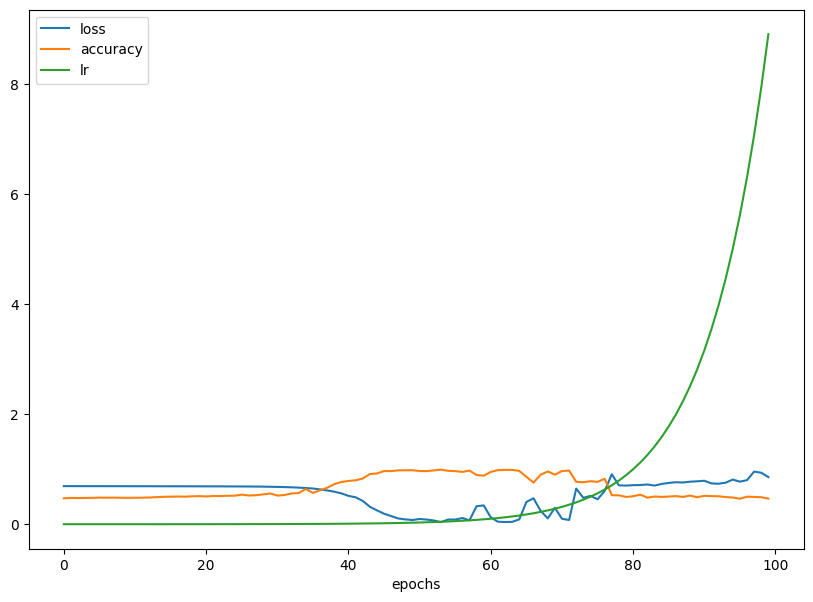

In [50]:
# Kiểm tra lịch sử
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. loss')

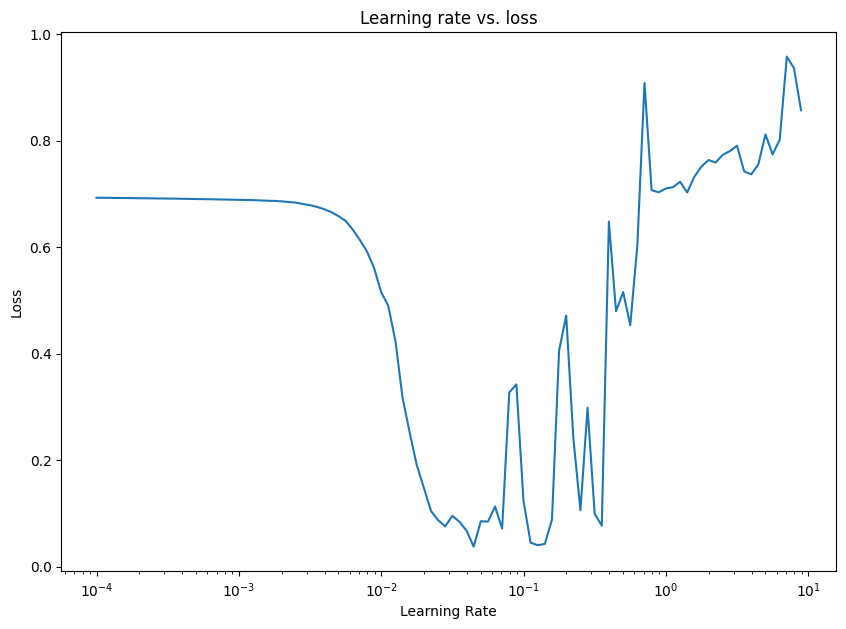

In [51]:
# Vẽ biểu đồ learning rate với loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # muốn trục x (learning rate) theo thang log
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")

In [52]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Biên dịch mô hình với tốc độ học lý tưởng
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.06), # sử dụng tf.keras.optimizers.Adam (không phải "adam") để điều chỉnh tốc độ học
                metrics=["accuracy"])

# Khớp mô hình cho 20 epoch (ít hơn trước 5)
history = model_10.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.6740 - accuracy: 0.5825
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.6413
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.8188
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2120 - accuracy: 0.9625
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0992 - accuracy: 0.9750
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1032 - accuracy: 0.9638
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.9737
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0832 - accuracy: 0.9712
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9900
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 0.9887
Epoch 11/50
25/25 [

In [53]:
# Kiểm tra độ chính xác của mô hình
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9950
Model loss on test set: 0.017190637066960335
Model accuracy on test set: 99.50%


In [54]:
# Tạo confusion matrix
from sklearn.metrics import confusion_matrix

# Đưa ra dự đoán
y_preds = model_10.predict(X_test)

y_test_1 = y_test.reshape(-1,1)

# Tạo confusion matrix
confusion_matrix(y_test_1, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
y_test_1.shape, y_preds.shape

((200, 1), (200, 1))

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[9.9801105e-01],
       [9.9999815e-01],
       [9.9958974e-01],
       [9.9998105e-01],
       [2.1452347e-03],
       [7.6326733e-06],
       [9.7428966e-01],
       [2.6242540e-04],
       [9.9999541e-01],
       [5.8502506e-04]], dtype=float32)

In [ ]:
# Chuyển xác suất dự đoán sang dạng nhị phân và xem 10 dự đoán đầu tiên
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
confusion_matrix(y_test, tf.round(y_preds))


array([[100,   1],
       [  1,  98]])

In [ ]:
import itertools

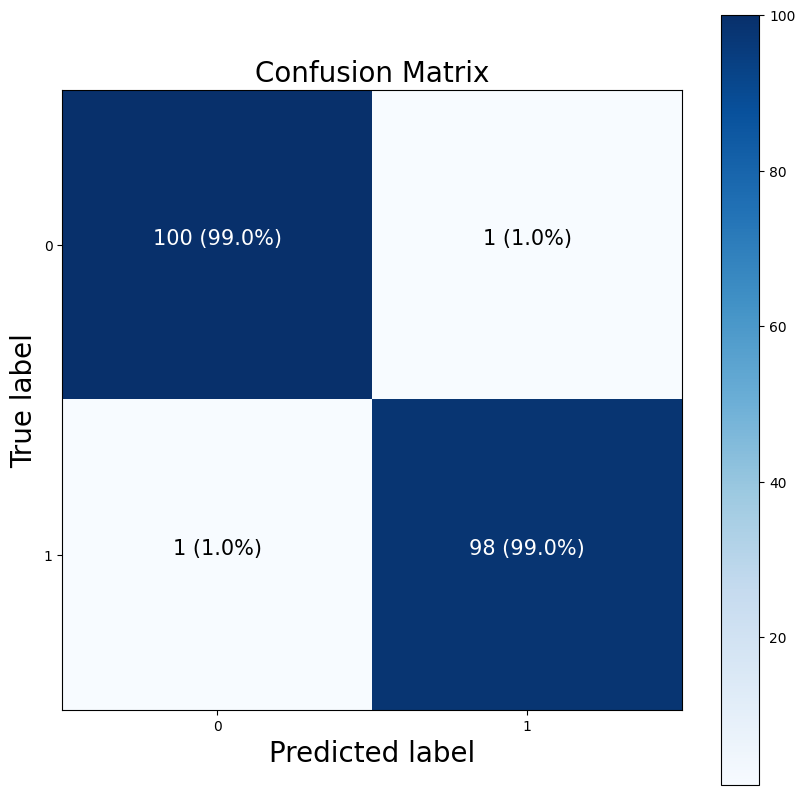

In [ ]:
figsize = (10, 10)

# Tạo confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)

cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Tạo classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Dán nhãn các trục
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Đặt nhãn trục x thành bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Điều chỉnh size của nhãn
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Thiết lập ngưỡng cho các màu khác nhau
threshold = (cm.max() + cm.min()) / 2.

# Lập biểu đồ văn bản ở từng cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [ ]:
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i, j)

0 0
0 1
1 0
1 1


# Lam viec voi da mau (phan loai da lop)

In [55]:
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist

# Dữ liệu đã được sắp xếp thành tập huấn luyện và tập kiểm tra
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


In [56]:
# Hiển thị mẫu huấn luyện đầu tiên
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [57]:
# Kiểm tra shape của dữ liệu
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [58]:
#Kiểm tra shape của một mẫu đơn lẻ
train_data[0].shape, train_labels[0].shape

((28, 28), ())

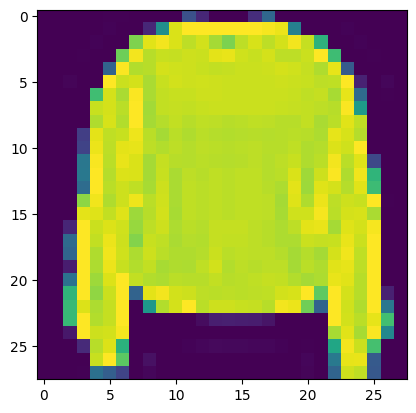

In [59]:
# Lập biểu đồ một mẫu duy nhất
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [60]:
train_labels[7]

2

In [61]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

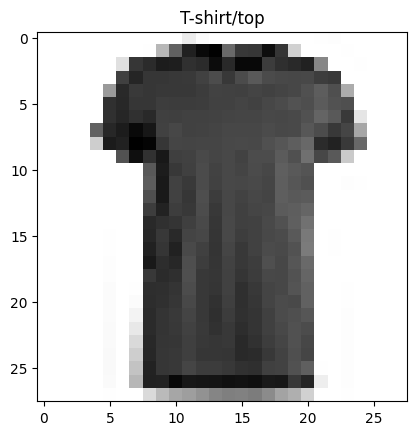

In [62]:
# Vẽ biểu đồ ảnh mẫu và nhãn của nó
# thay đổi màu sắc thành đen và trắng
plt.imshow(train_data[17], cmap=plt.cm.binary) 
plt.title(class_names[train_labels[17]])

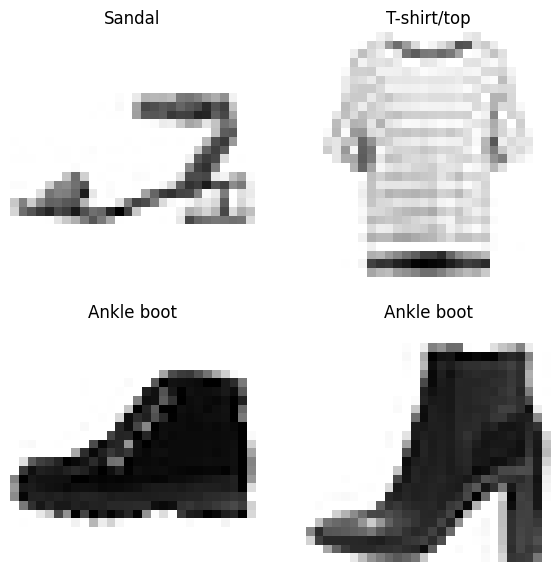

In [63]:
# Vẽ biểu đồ nhiều hình của fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [64]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # lớp đầu vào (cần reshape 28x28 thành 784, lớp Flatten sẽ thực hiện điều này cho chúng ta)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape là 10, activation là softmax
])

# Biên dịch mô hình
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # hàm mất mát khác nhau cho phân loại đa lớp
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Khớp mô hình
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) 
# xem mô hình hoạt động như thế nào trên tập kiểm tra trong quá trình huấn luyện

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.9552 - accuracy: 0.2529 - val_loss: 1.6920 - val_accuracy: 0.2984
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5705 - accuracy: 0.3600 - val_loss: 1.4127 - val_accuracy: 0.4171
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2754 - accuracy: 0.4610 - val_loss: 1.1385 - val_accuracy: 0.4986
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0933 - accuracy: 0.5248 - val_loss: 1.0897 - val_accuracy: 0.5166
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0575 - accuracy: 0.5433 - val_loss: 1.0572 - val_accuracy: 0.5361
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0418 - accuracy: 0.5530 - val_loss: 1.0383 - val_accuracy: 0.5616
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0303 - accuracy: 0.5630 - val_loss: 1.0875 - val_accuracy:

In [65]:
# Kiểm tra shape của mô hình
# Lưu ý: "None" trong (None, 784) là batch_size, chúng ta sẽ đề cập nó sau
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 4)                 3140      
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
# Kiểm tra các giá trị nhỏ nhất, lớn nhất của dữ liệu huấn luyện
train_data.min(), train_data.max()

(0, 255)

In [67]:
# Chia các hình ảnh huấn luyện và kiểm tra cho giá trị lớn nhất (chuẩn hóa nó)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Kiểm tra các giá trị lớn nhất và nhỏ nhất của dữ liệu huấn luyện
train_data.min(), train_data.max()

(0.0, 1.0)

In [68]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # lớp đầu vào (cần reshape 28x28 thành 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape là 10, activation là softmax
])

# Biên dịch mô hình
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Khớp mô hình (với dữ liệu đã chuẩn hóa)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10


2023-11-13 21:25:16.496265: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 6s 3ms/step - loss: 1.4066 - accuracy: 0.4413 - val_loss: 0.9538 - val_accuracy: 0.6650
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8361 - accuracy: 0.6990 - val_loss: 0.7855 - val_accuracy: 0.7135
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7315 - accuracy: 0.7316 - val_loss: 0.7343 - val_accuracy: 0.7154
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6854 - accuracy: 0.7458 - val_loss: 0.6926 - val_accuracy: 0.7368
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6592 - accuracy: 0.7554 - val_loss: 0.6799 - val_accuracy: 0.7468
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6379 - accuracy: 0.7628 - val_loss: 0.6636 - val_accuracy: 0.7552
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6250 - accuracy: 0.7700 - val_loss: 0.6418 - val_accuracy: 0.7655
Epo

<Axes: title={'center': 'Normalized data'}>

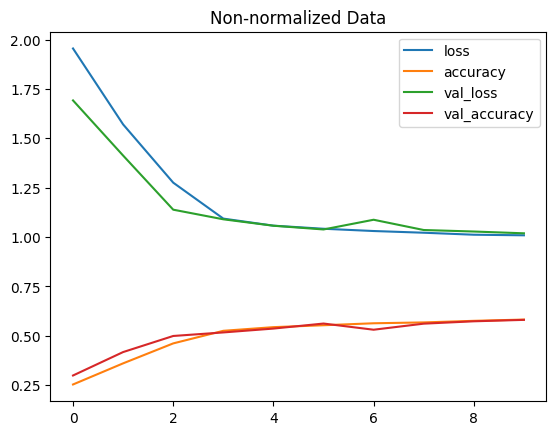

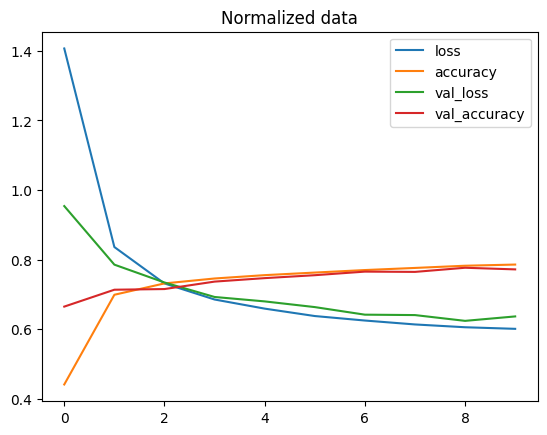

In [69]:
import pandas as pd
# Vẽ biểu đồ loss curve của dữ liệu không được chuẩn hóa
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Vẽ biểu đồ loss curve của dữ liệu đã được chuẩn hóa
pd.DataFrame(norm_history.history).plot(title="Normalized data")

In [70]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # lớp đầu vào (cần reshape 28x28 thành 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape là 10, activation là softmax
])

# Biên dịch mô hình
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Tạo learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Khớp mô hình
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # mô hình đang hoạt động khá tốt với tốc độ học hiện tại, có thể không cần 100 epoch
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40


2023-11-13 21:26:01.929524: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 2ms/step - loss: 1.1257 - accuracy: 0.5850 - val_loss: 0.8637 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7558 - accuracy: 0.7391 - val_loss: 0.7112 - val_accuracy: 0.7564 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6559 - accuracy: 0.7755 - val_loss: 0.6477 - val_accuracy: 0.7824 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6038 - accuracy: 0.7941 - val_loss: 0.6219 - val_accuracy: 0.7894 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5797 - accuracy: 0.8005 - val_loss: 0.6014 - val_accuracy: 0.7950 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5634 - accuracy: 0.8056 - val_loss: 0.5941 - val_accuracy: 0.7949 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step -

Text(0.5, 1.0, 'Finding the ideal learning rate')

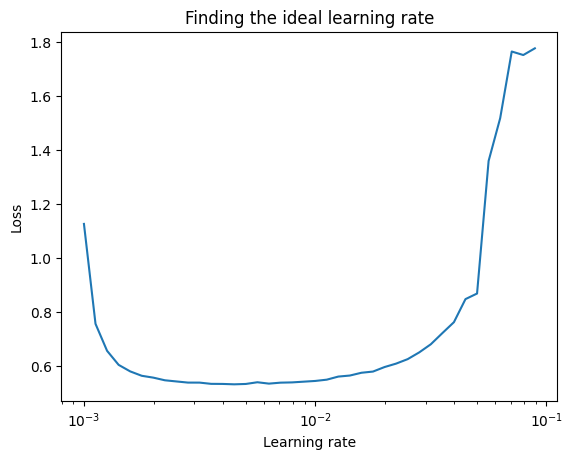

In [71]:
# Vẽ đường cong suy giảm tốc độ học
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # cần trục x theo thang log
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [73]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # lớp đầu vào (cần reshape 28x28 thành 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape là 10, activation là softmax
])

# Biên dịch mô hình
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # tốc độ học lý tưởng (giống mặc định)
                 metrics=["accuracy"])

# Khớp mô hình
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20


2023-11-13 21:31:31.741401: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 6s 3ms/step - loss: 1.3023 - accuracy: 0.5347 - val_loss: 0.9352 - val_accuracy: 0.6953
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7970 - accuracy: 0.7294 - val_loss: 0.7760 - val_accuracy: 0.7266
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6928 - accuracy: 0.7522 - val_loss: 0.7199 - val_accuracy: 0.7353
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6508 - accuracy: 0.7670 - val_loss: 0.6760 - val_accuracy: 0.7569
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6293 - accuracy: 0.7769 - val_loss: 0.6669 - val_accuracy: 0.7660
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6150 - accuracy: 0.7826 - val_loss: 0.6549 - val_accuracy: 0.7700
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6082 - accuracy: 0.7854 - val_loss: 0.6683 - val_accuracy: 0.7577
Epo

In [74]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    
    # Tạo confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Vẽ figure và chỉnh cho nó đẹp hơn
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) 
    # màu sắc thể hiện độ 'đúng' của một lớp, càng đậm tức là càng tốt hơn
    fig.colorbar(cax)

    #danh sách các lớp
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Dán nhãn các trục
    ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes), # tạo đủ trục cho từng lớp
        yticks=np.arange(n_classes),
        xticklabels=labels, # các trục sẽ được gắn nhãn tên lớp (nếu chúng tồn tại) hoặc int
        yticklabels=labels)
    
    # Làm cho các nhãn trục x xuất hiện ở dưới cùng
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Thiết lập ngưỡng cho các màu khác nhau
    threshold = (cm.max() + cm.min()) / 2.

    # Lập biểu đồ văn bản ở từng cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)
        
    

In [75]:
# Đưa ra dự đoán với mô hình gần đây nhất
y_probs = model_14.predict(test_data) # "probs" là viết tắt của probabilities (xác suất)

# Xem 5 dự đoán đầu tiên
y_probs[:5]

313/313 [==============================] - 2s 5ms/step


array([[4.61922264e-06, 3.05102300e-03, 6.28471344e-06, 7.80520088e-04,
        1.46803155e-03, 3.21074158e-01, 5.68508294e-05, 3.29284333e-02,
        7.07120707e-05, 6.40559256e-01],
       [4.84882883e-04, 4.65079234e-12, 9.20388818e-01, 2.37971239e-04,
        1.17368875e-02, 3.37103678e-23, 6.71513677e-02, 1.02582834e-30,
        5.73467107e-10, 2.17973207e-20],
       [7.00461351e-06, 9.98124659e-01, 3.20204453e-11, 1.81841094e-03,
        1.32335964e-08, 2.89004296e-15, 5.72458170e-08, 4.60567171e-05,
        7.93635806e-08, 3.69457712e-06],
       [1.20855432e-07, 9.93627071e-01, 1.65895769e-11, 3.30361840e-03,
        9.18114154e-08, 2.83226494e-15, 6.97242131e-09, 1.84768669e-06,
        5.89177804e-11, 3.06716538e-03],
       [5.51574677e-02, 4.11521141e-05, 2.15525135e-01, 9.07221064e-02,
        1.34777024e-01, 8.84908032e-12, 5.03530681e-01, 2.42193452e-14,
        2.46331765e-04, 3.20093257e-10]], dtype=float32)

In [76]:
# Xem số lớp đã dự đoán và nhãn cho mẫu đầu tiên
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [77]:
# Chuyển toàn bộ dự đoán từ xác suất thành nhãn
y_preds = y_probs.argmax(axis=1)

# Xem 10 dự đoán đầu tiên
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [78]:
# Kiểm tra confusion matrix không được làm đẹp
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[694,   1,  10,  94,   6,   0, 159,   1,  34,   1],
       [  2, 912,   0,  64,   6,   0,  10,   1,   4,   1],
       [ 17,   1, 539,  13, 244,   2, 178,   0,   6,   0],
       [ 24,  10,   5, 817,  51,   1,  84,   0,   8,   0],
       [  1,   0,  86,  42, 774,  10,  81,   0,   5,   1],
       [  0,   0,   0,   1,   6, 890,   0,  53,  15,  35],
       [115,   1, 114,  58, 160,   2, 509,   0,  40,   1],
       [  0,   1,   0,   0,   0,  46,   0, 897,   2,  54],
       [  1,   1,   0,   5,   7,  24,  39,   5, 918,   0],
       [  0,   2,   0,   1,   4,  29,   0,  46,   1, 917]])

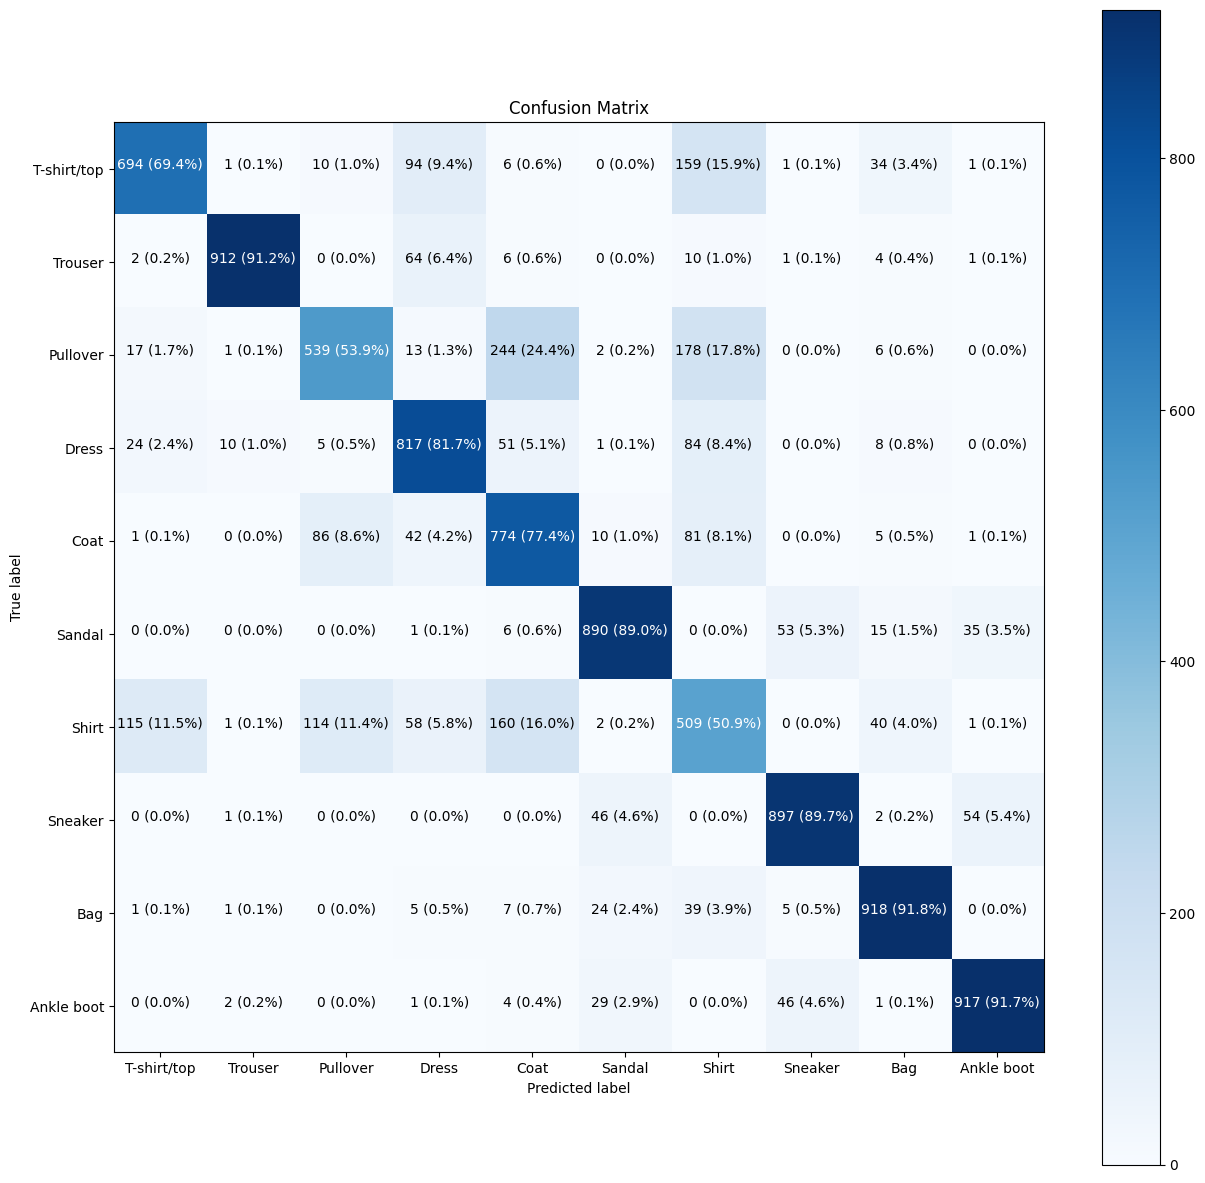

In [79]:
# Tạo confusion matrix đẹp hơn
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [80]:
import random

def plot_random_image(model, images, true_labels, classes):
    # Thiết lập random integer
    i = random.randint(0, len(images))

    # Tạo các mục tiêu và dự đoán
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28)) # cần reshape để mô hình có đúng kích thước
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Vẽ ảnh mục tiêu
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Thay đổi màu của tiêu đề tùy xem dự đoán đúng hay sai
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Thêm thông tin xlabel (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # đặt color là green hoặc red

1/1 [==============================] - 0s 27ms/step


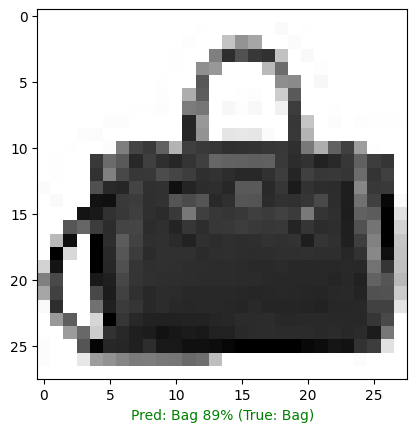

In [85]:
# Kiểm tra ảnh ngẫu nhiên cũng như dự đoán của nó
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

# Mo hinh cua chung ta dang hoc nhung pattern nao 

In [82]:
# Tìm các layer của mô hình gần đây nhất
model_14.layers

In [83]:
model_14.layers[1]

In [84]:
# Lấy các pattern của một layer trong mạng
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 ma trận trọng số kích thước của dữ liệu đầu vào (28x28) mỗi nơ-ron (4)
weights, weights.shape

(array([[-0.738886  ,  0.52893513,  0.47364014,  0.06825672],
        [-0.38089487,  0.45245454,  0.9929765 , -0.04924326],
        [-0.7032515 ,  0.8743761 , -0.49214336, -0.06229664],
        ...,
        [ 0.9344338 ,  0.43026143, -0.2591429 , -0.00489895],
        [ 1.6771381 , -0.28598225,  0.18999556,  0.0682157 ],
        [ 0.11723835,  0.7239291 ,  0.59261835,  0.0561495 ]],
       dtype=float32),
 (784, 4))